# Advanced Data Science Project:  Does this school need more resources?

Using data from Chicago's Open Data Portal, I embarked on a machine learning project to predict whether or not a school would received a passing "Overall Rating" score, or would receive a failing score, which indicates that the school needs more resources.  The classifier is based on a variety of indices from the School Progress Reports and School Profile information, and the dataset includes information from the years 2016-17, 2017-18, and 2018-19.  

In [506]:
import pandas as pd
import numpy as np
import pyreadstat
import sklearn as sk


In [507]:
#change settings to view all columns
pd.set_option('display.max_columns', 500)

In [508]:
#read in data
data1 = pd.read_csv("Chicago_Public_Schools_-_School_Progress_Reports_SY1617.csv")
data2 = pd.read_csv("Chicago_Public_Schools_-_School_Profile_Information_SY1617.csv")
data3 = pd.read_csv("Chicago_Public_Schools_-_School_Progress_Reports_SY1718.csv")
data4 = pd.read_csv("Chicago_Public_Schools_-_School_Profile_Information_SY1718.csv")
data5 = pd.read_csv("Chicago_Public_Schools_-_School_Progress_Reports_SY1819.csv")
data6 = pd.read_csv("Chicago_Public_Schools_-_School_Profile_Information_SY1819.csv")
 

In [509]:
data1.head()  

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,Healthy_School_Certification,Healthy_School_Certification_Description,Creative_School_Certification,Creative_School_Certification_Description,NWEA_Reading_Growth_Grade_3_Pct,NWEA_Reading_Growth_Grade_3_Lbl,NWEA_Reading_Growth_Grade_4_Pct,NWEA_Reading_Growth_Grade_4_Lbl,NWEA_Reading_Growth_Grade_5_Pct,NWEA_Reading_Growth_Grade_5_Lbl,NWEA_Reading_Growth_Grade_6_Pct,NWEA_Reading_Growth_Grade_6_Lbl,NWEA_Reading_Growth_Grade_7_Pct,NWEA_Reading_Growth_Grade_7_Lbl,NWEA_Reading_Growth_Grade_8_Pct,NWEA_Reading_Growth_Grade_8_Lbl,NWEA_Math_Growth_Grade_3_Pct,NWEA_Math_Growth_Grade_3_Lbl,NWEA_Math_Growth_Grade_4_Pct,NWEA_Math_Growth_Grade_4_Lbl,NWEA_Math_Growth_Grade_5_Pct,NWEA_Math_Growth_Grade_5_Lbl,NWEA_Math_Growth_Grade_6_Pct,NWEA_Math_Growth_Grade_6_Lbl,NWEA_Math_Growth_Grade_7_Pct,NWEA_Math_Growth_Grade_7_Lbl,NWEA_Math_Growth_Grade_8_Pct,NWEA_Math_Growth_Grade_8_Lbl,NWEA_Reading_Attainment_Grade_2_Pct,NWEA_Reading_Attainment_Grade_2_Lbl,NWEA_Reading_Attainment_Grade_3_Pct,NWEA_Reading_Attainment_Grade_3_Lbl,NWEA_Reading_Attainment_Grade_4_Pct,NWEA_Reading_Attainment_Grade_4_Lbl,NWEA_Reading_Attainment_Grade_5_Pct,NWEA_Reading_Attainment_Grade_5_Lbl,NWEA_Reading_Attainment_Grade_6_Pct,NWEA_Reading_Attainment_Grade_6_Lbl,NWEA_Reading_Attainment_Grade_7_Pct,NWEA_Reading_Attainment_Grade_7_Lbl,NWEA_Reading_Attainment_Grade_8_Pct,NWEA_Reading_Attainment_Grade_8_Lbl,NWEA_Math_Attainment_Grade_2_Pct,NWEA_Math_Attainment_Grade_2_Lbl,NWEA_Math_Attainment_Grade_3_Pct,NWEA_Math_Attainment_Grade_3_Lbl,NWEA_Math_Attainment_Grade_4_Pct,NWEA_Math_Attainment_Grade_4_Lbl,NWEA_Math_Attainment_Grade_5_Pct,NWEA_Math_Attainment_Grade_5_Lbl,NWEA_Math_Attainment_Grade_6_Pct,NWEA_Math_Attainment_Grade_6_Lbl,NWEA_Math_Attainment_Grade_7_Pct,NWEA_Math_Attainment_Grade_7_Lbl,NWEA_Math_Attainment_Grade_8_Pct,NWEA_Math_Attainment_Grade_8_Lbl,School_Survey_Involved_Families,School_Survey_Supportive_Environment,School_Survey_Ambitious_Instruction,School_Survey_Effective_Leaders,School_Survey_Collaborative_Teachers,School_Survey_Safety,Suspensions_Per_100_Students_Year_1_Pct,Suspensions_Per_100_Students_Year_2_Pct,Suspensions_Per_100_Students_Avg_Pct,Misconducts_To_Suspensions_Year_1_Pct,Misconducts_To_Suspensions_Year_2_Pct,Misconducts_To_Suspensions_Avg_Pct,Average_Length_Suspension_Year_1_Pct,Average_Length_Suspension_Year_2_Pct,Average_Length_Suspension_Avg_Pct,Behavior_Discipline_Year_1,Behavior_Discipline_Year_2,School_Survey_School_Community,School_Survey_Parent_Teacher_Partnership,School_Survey_Quality_Of_Facilities,Student_Attendance_Year_1_Pct,Student_Attendance_Year_2_Pct,Student_Attendance_Avg_Pct,Teacher_Attendance_Year_1_Pct,Teacher_Attendance_Year_2_Pct,Teacher_Attendance_Avg_Pct,One_Year_Dropout_Rate_Year_1_Pct,One_Year_Dropout_Rate_Year_2_Pct,One_Year_Dropout_Rate_Avg_Pct,Other_Metrics_Year_1,Other_Metrics_Year_2,Growth_ACT_Grade_11_Pct,Growth_ACT_Grade_11_Lbl,Attainment_ACT_Grade_11_Pct,Attainment_ACT_Grade_11_Lbl,Freshmen_On_Track_School_Pct_Year_2,Freshmen_On_Track_CPS_Pct_Year_2,Freshmen_On_Track_School_Pct_Year_1,Freshmen_On_Track_CPS_Pct_Year_1,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_Sc

Check data sets to make sure they contain "Overall Rating" and count the number of missing values.

In [510]:
##data2
data2.loc[:, "Overall_Rating"].isna().sum()

0

In [511]:
##data4
data4.loc[:, "Overall_Rating"].isna().sum()

2

In [512]:
##data6
data6.loc[:, "Overall_Rating"].isna().sum()

0

These rows are mostly complete.  We can move on to reducing and merging the dataframes.

In [513]:
##join data

##keep columns in data1 that we want

data1 = data1.loc[:, ['School_ID', 'Student_Growth_Rating', 'Student_Attainment_Rating', 
                      'Culture_Climate_Rating', 'School_Survey_Student_Response_Rate_Pct']]

data2 = data2.loc[:, ['School_ID', 'Student_Count_Total', 'Student_Count_Low_Income', 'Student_Count_Special_Ed', 
                      'Student_Count_English_Learners', 'Student_Count_Black', 'Student_Count_Hispanic',
                      'Student_Count_White', 'Student_Count_Asian', 'Student_Count_Native_American', 
                      'Student_Count_Other_Ethnicity', 'Dress_Code', 'Title_1_Eligible', 
                      'Overall_Rating']]


In [514]:
data1.head()

,School_ID,Student_Growth_Rating,Student_Attainment_Rating,Culture_Climate_Rating,School_Survey_Student_Response_Rate_Pct
0,610104,ABOVE AVERAGE,ABOVE AVERAGE,WELL ORGANIZED,97.9
1,610390,BELOW AVERAGE,BELOW AVERAGE,ORGANIZED,97.4
2,610070,ABOVE AVERAGE,AVERAGE,ORGANIZED,87.3
3,400117,FAR ABOVE AVERAGE,AVERAGE,WELL ORGANIZED,57.9
4,610251,ABOVE AVERAGE,AVERAGE,WELL ORGANIZED,80.6


In [515]:
##Select necessary columns from data3 and data4

data3 = data3.loc[:, ['School_ID', 'Student_Growth_Rating', 'Student_Attainment_Rating', 
                      'Culture_Climate_Rating', 'School_Survey_Student_Response_Rate_Pct']] 

data4 = data4.loc[:, ['School_ID', 'Student_Count_Total', 'Student_Count_Low_Income', 'Student_Count_Special_Ed', 
                      'Student_Count_English_Learners', 'Student_Count_Black', 'Student_Count_Hispanic',
                      'Student_Count_White', 'Student_Count_Asian', 'Student_Count_Native_American', 
                      'Student_Count_Other_Ethnicity', 'Dress_Code', 'Title_1_Eligible', 
                      'Overall_Rating']]

In [516]:
##Select necessary columns from data5 and data6

data5 = data5.loc[:, ['School_ID', 'Student_Growth_Rating', 'Student_Attainment_Rating', 
                      'Culture_Climate_Rating', 'School_Survey_Student_Response_Rate_Pct']] 

data6 = data6.loc[:, ['School_ID', 'Student_Count_Total', 'Student_Count_Low_Income', 'Student_Count_Special_Ed', 
                      'Student_Count_English_Learners', 'Student_Count_Black', 'Student_Count_Hispanic',
                      'Student_Count_White', 'Student_Count_Asian', 'Student_Count_Native_American', 
                      'Student_Count_Other_Ethnicity', 'Dress_Code', 'Title_1_Eligible', 
                      'Overall_Rating']]

In [517]:
###Merge the dataframes

## join data1 and data2 on School_ID
data_1 = data1.merge(data2, left_on='School_ID', right_on='School_ID',suffixes=('_left', '_right'))
data_2 = data3.merge(data4, left_on='School_ID', right_on='School_ID',suffixes=('_left', '_right'))
data_3 = data5.merge(data6, left_on='School_ID', right_on='School_ID',suffixes=('_left', '_right'))

In [518]:
##Concatenate the new dataframes

## add data_2 to data_1 to form new df = data
data = pd.concat([data_1,data_2], sort=True)
##add data_3 to data
data = pd.concat([data ,data_3], sort=True)


In [519]:
data.head()

,Culture_Climate_Rating,Dress_Code,Overall_Rating,School_ID,School_Survey_Student_Response_Rate_Pct,Student_Attainment_Rating,Student_Count_Asian,Student_Count_Black,Student_Count_English_Learners,Student_Count_Hispanic,Student_Count_Low_Income,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Special_Ed,Student_Count_Total,Student_Count_White,Student_Growth_Rating,Title_1_Eligible
0,WELL ORGANIZED,Y,Level 1,610104,97.9,ABOVE AVERAGE,19,6,62,189,227,7,0,80,659,408,ABOVE AVERAGE,N
1,ORGANIZED,Y,Level 1,610390,97.4,BELOW AVERAGE,31,52,29,414,494,2,0,58,556,46,BELOW AVERAGE,Y
2,ORGANIZED,Y,Level 1,610070,87.3,AVERAGE,33,34,197,548,553,0,0,165,693,65,ABOVE AVERAGE,Y
3,WELL ORGANIZED,Y,Level 1+,400117,57.9,AVERAGE,0,627,8,8,551,0,0,149,656,1,FAR ABOVE AVERAGE,Y
4,WELL ORGANIZED,Y,Level 1,610251,80.6,AVERAGE,5,358,4,11,320,1,0,63,375,0,ABOVE AVERAGE,Y


In [520]:
##Get summary of data

data.describe()

,School_ID,School_Survey_Student_Response_Rate_Pct,Student_Count_Asian,Student_Count_Black,Student_Count_English_Learners,Student_Count_Hispanic,Student_Count_Low_Income,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Special_Ed,Student_Count_Total,Student_Count_White
count,1976.000000,1955.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.0,1976.000000,1976.000000,1976.000000
mean,568835.905364,80.031816,22.760121,200.355263,101.436235,256.779352,406.991397,1.644737,0.0,77.534919,549.123988,57.910931
std,83429.294992,24.436479,72.920717,205.012534,136.190797,334.144762,294.623612,2.982871,0.0,52.145510,400.651204,147.239704
min,400009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,609732.750000,74.100000,0.000000,27.000000,3.000000,10.000000,214.000000,0.000000,0.0,43.000000,299.000000,1.000000
50%,609961.000000,89.000000,1.000000,154.500000,32.000000,104.000000,335.000000,1.000000,0.0,66.000000,453.000000,5.000000
75%,610179.000000,95.600000,8.000000,322.000000,167.000000,413.250000,515.000000,2.000000,0.0,96.000000,688.250000,33.000000
max,610594.000000,99.900000,1017.000000,1740.000000,747.000000,2422.000000,2713.000000,53.000000,0.0,457.000000,4514.000000,1766.000000


In [521]:
##There are no students in the "Other Ethnicity" column, so drop these
data.drop("Student_Count_Other_Ethnicity", axis=1, inplace = True)

In [522]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 653
Data columns (total 17 columns):
Culture_Climate_Rating                     1968 non-null object
Dress_Code                                 1974 non-null object
Overall_Rating                             1974 non-null object
School_ID                                  1976 non-null int64
School_Survey_Student_Response_Rate_Pct    1955 non-null float64
Student_Attainment_Rating                  1968 non-null object
Student_Count_Asian                        1976 non-null int64
Student_Count_Black                        1976 non-null int64
Student_Count_English_Learners             1976 non-null int64
Student_Count_Hispanic                     1976 non-null int64
Student_Count_Low_Income                   1976 non-null int64
Student_Count_Native_American              1976 non-null int64
Student_Count_Special_Ed                   1976 non-null int64
Student_Count_Total                        1976 non-null int64
Studen

In [536]:
#View distribution of Overall Rating before it is divided into "pass" and "fail"
df = data.groupby(["Overall_Rating"]).count().iloc[:,2]

In [537]:
df

Overall_Rating
INABILITY TO RATE      2
Inability to Rate     68
Level 1              571
Level 1+             551
Level 2              331
Level 2+             426
Level 3               25
Name: School_ID, dtype: int64

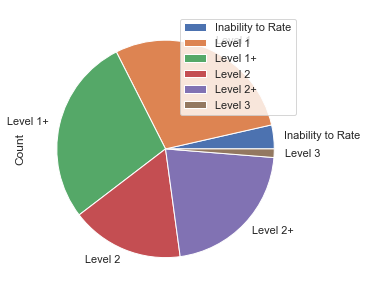

In [538]:
#create a graphic showing the distribution of "Overall Rating" levels

df = pd.DataFrame({'Count' : [70, df[2], df[3], df[4], df[5], df[6]]},
                 index = ["Inability to Rate", "Level 1", "Level 1+", "Level 2", "Level 2+", "Level 3"])


plot = df.plot.pie(y = 'Count', figsize=(5,5))

In [539]:
## Turn "Overall Rating" into a column of dummies with 1 for Level 1+, 1 and Level 2+; 
#and 0 for Level 2 and Level3

data.replace(['Level 1+', 'Level 1', 'Level 2+', 'Level 2', 'Level 3', 'Inability to Rate'], [1, 1, 1, 0, 0, 3], inplace = True)

In [540]:
data.head()

,Culture_Climate_Rating,Dress_Code,Overall_Rating,School_ID,School_Survey_Student_Response_Rate_Pct,Student_Attainment_Rating,Student_Count_Asian,Student_Count_Black,Student_Count_English_Learners,Student_Count_Hispanic,Student_Count_Low_Income,Student_Count_Native_American,Student_Count_Special_Ed,Student_Count_Total,Student_Count_White,Student_Growth_Rating,Title_1_Eligible
0,WELL ORGANIZED,Y,1,610104,97.9,ABOVE AVERAGE,19,6,62,189,227,7,80,659,408,ABOVE AVERAGE,N
1,ORGANIZED,Y,1,610390,97.4,BELOW AVERAGE,31,52,29,414,494,2,58,556,46,BELOW AVERAGE,Y
2,ORGANIZED,Y,1,610070,87.3,AVERAGE,33,34,197,548,553,0,165,693,65,ABOVE AVERAGE,Y
3,WELL ORGANIZED,Y,1,400117,57.9,AVERAGE,0,627,8,8,551,0,149,656,1,FAR ABOVE AVERAGE,Y
4,WELL ORGANIZED,Y,1,610251,80.6,AVERAGE,5,358,4,11,320,1,63,375,0,ABOVE AVERAGE,Y


In [541]:
## Turn columns with Y/N into 1 for Y, and 0 for N
data.replace(['Y', 'N'], [1, 0], inplace = True)

In [542]:
data.head()

,Culture_Climate_Rating,Dress_Code,Overall_Rating,School_ID,School_Survey_Student_Response_Rate_Pct,Student_Attainment_Rating,Student_Count_Asian,Student_Count_Black,Student_Count_English_Learners,Student_Count_Hispanic,Student_Count_Low_Income,Student_Count_Native_American,Student_Count_Special_Ed,Student_Count_Total,Student_Count_White,Student_Growth_Rating,Title_1_Eligible
0,WELL ORGANIZED,1,1,610104,97.9,ABOVE AVERAGE,19,6,62,189,227,7,80,659,408,ABOVE AVERAGE,0
1,ORGANIZED,1,1,610390,97.4,BELOW AVERAGE,31,52,29,414,494,2,58,556,46,BELOW AVERAGE,1
2,ORGANIZED,1,1,610070,87.3,AVERAGE,33,34,197,548,553,0,165,693,65,ABOVE AVERAGE,1
3,WELL ORGANIZED,1,1,400117,57.9,AVERAGE,0,627,8,8,551,0,149,656,1,FAR ABOVE AVERAGE,1
4,WELL ORGANIZED,1,1,610251,80.6,AVERAGE,5,358,4,11,320,1,63,375,0,ABOVE AVERAGE,1


In [543]:
#Drop na values to prepare for machine learning task since there is no way to fill in missing data
data.dropna(inplace = True)

In [544]:
data.drop(21, axis=0, inplace = True)

In [545]:
##check for any null values
data.isna().sum()

Culture_Climate_Rating                     0
Dress_Code                                 0
Overall_Rating                             0
School_ID                                  0
School_Survey_Student_Response_Rate_Pct    0
Student_Attainment_Rating                  0
Student_Count_Asian                        0
Student_Count_Black                        0
Student_Count_English_Learners             0
Student_Count_Hispanic                     0
Student_Count_Low_Income                   0
Student_Count_Native_American              0
Student_Count_Special_Ed                   0
Student_Count_Total                        0
Student_Count_White                        0
Student_Growth_Rating                      0
Title_1_Eligible                           0
dtype: int64

In [546]:
##Drop School ID to prepare for Logistic Regression

data = data.drop("School_ID", axis = 1)

In [547]:
##Break Culture_Climate_Rating into 2 = organized (organized, well organized) and 0 = not_organized
#(not yet organized), and 1=partially organized (partially, moderately)

data.replace(['NOT ENOUGH DATA', 'NOT YET ORGANIZED', 'ORGANIZED', 'PARTIALLY ORGANIZED',
              'WELL ORGANIZED', 'MODERATELY ORGANIZED', 'TRUE', 'FALSE'], [-1, 0, 2, 1, 2, 1, 0, 1], inplace = True)


In [548]:
##Break Student_Attainment_Rating and Student_Growth_Rating into 0 = below expections, 
#1 = met expectations/average, 2 = above expectations 

data.replace(['NO DATA AVAILABLE', 'ABOVE EXPECTATIONS', 'AVERAGE', 'BELOW AVERAGE',
              'BELOW EXPECTATIONS', 'FAR ABOVE AVERAGE', 'FAR ABOVE EXPECTATIONS', 
             'FAR BELOW AVERAGE', 'FAR BELOW EXPECTATIONS', 'MET EXPECTATIONS', 'ABOVE AVERAGE'], 
             [-1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2], inplace = True)


In [549]:
#Get dummies for categorical columns

data = pd.get_dummies(data, prefix=None, prefix_sep='_', 
               columns=["Culture_Climate_Rating", "Student_Attainment_Rating", "Student_Growth_Rating"], sparse=False, 
               drop_first=True, dtype=None)

In [550]:
data.head()  

data.rename(columns = {"School_Survey_Student_Response_Rate_Pct" : "Student_Response_Rate", 
                       "Student_Count_Asian" : "Asian", "Student_Count_Black" : "Black", 
                       "Student_Count_English_Learners": "English_Learner", 
                       "Student_Count_Hispanic": "Hispanic", "Student_Count_Low_Income": "Low_Income", 
                       "Student_Count_Native_American":"Native_American", 
                       "Student_Count_Special_Ed": "Special_Ed", "Student_Count_Total": "Student_Total", 
                       "Student_Count_White": "White", "Title_1_Eligible": "Title_1"}, inplace=True)

In [551]:
##drop any rows where response is 3

data[data["Overall_Rating"]==3].count()

data = data[data.Overall_Rating != 3]

In [552]:
##turn true/false into 1/0
data.Dress_Code = data.Dress_Code.astype(int)

data.Title_1 = data.Title_1.astype(int)


In [553]:
data[data["Overall_Rating"]==3].count()

Dress_Code                     0
Overall_Rating                 0
Student_Response_Rate          0
Asian                          0
Black                          0
English_Learner                0
Hispanic                       0
Low_Income                     0
Native_American                0
Special_Ed                     0
Student_Total                  0
White                          0
Title_1                        0
Culture_Climate_Rating_0       0
Culture_Climate_Rating_1       0
Culture_Climate_Rating_2       0
Student_Attainment_Rating_0    0
Student_Attainment_Rating_1    0
Student_Attainment_Rating_2    0
Student_Growth_Rating_0        0
Student_Growth_Rating_1        0
Student_Growth_Rating_2        0
dtype: int64

## Feature Engineering

There are many features we could include in a regression model to predict whether or not a school receives a passing score, or if a school will require more support.  I will proceed by considering all the values chosen above as independent predictors.

## Machine Learning Task:  Classifier for Overall Rating

Due to the large amount of numerical data, I chose to use logistic regression to predict 'Overall Rating' scores of "Success" = 1 or "Needs Help" = 0.  The data gathered above will be broken randomly into a "test" and "train" set, and prediction accuracy will be measured using a Confusion Matrix.


In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [555]:
##prepare data for logistic regression by changing y column name

data = data.rename(columns = {"Overall_Rating" : "y"})

data.head()

,Dress_Code,y,Student_Response_Rate,Asian,Black,English_Learner,Hispanic,Low_Income,Native_American,Special_Ed,Student_Total,White,Title_1,Culture_Climate_Rating_0,Culture_Climate_Rating_1,Culture_Climate_Rating_2,Student_Attainment_Rating_0,Student_Attainment_Rating_1,Student_Attainment_Rating_2,Student_Growth_Rating_0,Student_Growth_Rating_1,Student_Growth_Rating_2
0,1,1,97.9,19,6,62,189,227,7,80,659,408,0,0,0,1,0,0,1,0,0,1
1,1,1,97.4,31,52,29,414,494,2,58,556,46,1,0,0,1,1,0,0,1,0,0
2,1,1,87.3,33,34,197,548,553,0,165,693,65,1,0,0,1,0,1,0,0,0,1
3,1,1,57.9,0,627,8,8,551,0,149,656,1,1,0,0,1,0,1,0,0,0,1
4,1,1,80.6,5,358,4,11,320,1,63,375,0,1,0,0,1,0,1,0,0,0,1


In [556]:
#Create X and y

X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

X.head()
y.head()

,y
0,1
1,1
2,1
3,1
4,1


In [557]:
X.head()

,Dress_Code,Student_Response_Rate,Asian,Black,English_Learner,Hispanic,Low_Income,Native_American,Special_Ed,Student_Total,White,Title_1,Culture_Climate_Rating_0,Culture_Climate_Rating_1,Culture_Climate_Rating_2,Student_Attainment_Rating_0,Student_Attainment_Rating_1,Student_Attainment_Rating_2,Student_Growth_Rating_0,Student_Growth_Rating_1,Student_Growth_Rating_2
0,1,97.9,19,6,62,189,227,7,80,659,408,0,0,0,1,0,0,1,0,0,1
1,1,97.4,31,52,29,414,494,2,58,556,46,1,0,0,1,1,0,0,1,0,0
2,1,87.3,33,34,197,548,553,0,165,693,65,1,0,0,1,0,1,0,0,0,1
3,1,57.9,0,627,8,8,551,0,149,656,1,1,0,0,1,0,1,0,0,0,1
4,1,80.6,5,358,4,11,320,1,63,375,0,1,0,0,1,0,1,0,0,0,1


In [558]:
##split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [559]:
import statsmodels.api as sm

logit = sm.Logit(y_train.astype(float), X_train.astype(float), missing = 'drop')

#?sm.Logit


#logit_model=sm.Logit(y,X)

#logit_model.fit()

result=logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.283391
         Iterations 9
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.395     
Dependent Variable:     y                   AIC:                 749.3449  
Date:                   2019-11-16 10:30    BIC:                 857.0601  
No. Observations:       1248                Log-Likelihood:      -353.67   
Df Model:               20                  LL-Null:             -584.28   
Df Residuals:           1227                LLR p-value:         3.7410e-85
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         9.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Dress_Code       

In [560]:
##predict for test set

y_pred = result.predict(X_test)


In [561]:
##impose a threshold of greater than 0.5, predict class 1; otherwise, predict class 0
for i in range(1, len(y_pred)):
    if y_pred.iloc[i] > 0.5:
        y_pred.iloc[i] = 1
    else:
        y_pred.iloc[i] = 0


In [562]:
y_pred = y_pred.astype(int)

In [563]:
##Confusion Matrix
sk.metrics.confusion_matrix(y_test, y_pred)

array([[ 77,  47],
       [ 36, 456]])

In [564]:
#precision
precision1 = (77/(77+36))

precision1

0.6814159292035398

In [565]:
recall1 = (77/(77+47))

recall2

0.6209677419354839

In [566]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="l1")
result2 = clf.fit(X_train,y_train)
thetaLasso=clf.coef_
print(thetaLasso.reshape(21,1))

##A few of the variables got reduced to 0.  I will make predictions and check the Confusion Matrix to see if 
## there are improvements to the model.


[[-3.03053264e-01]
 [-2.84382154e-04]
 [ 1.10037129e-02]
 [ 3.47021461e-03]
 [-1.74613890e-03]
 [ 5.53083699e-03]
 [-3.37330244e-03]
 [-4.31649328e-02]
 [-1.30916205e-02]
 [ 2.23447679e-03]
 [ 4.29232139e-03]
 [ 0.00000000e+00]
 [-4.68783082e-01]
 [ 0.00000000e+00]
 [ 9.22441164e-01]
 [-1.16537723e+00]
 [ 0.00000000e+00]
 [ 4.80900091e-01]
 [-2.51752984e+00]
 [-1.47993351e+00]
 [ 1.81877652e-01]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [567]:
##predict for test set

y_pred2 = result2.predict(X_test)


In [568]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [569]:
##Confusion Matrix
sk.metrics.confusion_matrix(y_test, y_pred2)

array([[ 77,  47],
       [ 32, 460]])

In [570]:
precision2 = (77/(77+32))

precision2

0.7064220183486238

In [571]:
recall2 = (77/(77+47))

recall2

0.6209677419354839

There is some improvement in the number of true negatives that were predicted with this adjusted model, and the number of true positives stayed the same.  The precision of model2 is greater than that of model1 and there was no change in recall.  Given more time I would explore the inclusion of interaction terms and perhaps scaling some of the inputs.